In [1]:
import glob # library to import multiples .csv files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### Limpando e trabalhando com os dados

In [2]:
#Obtendo e concatenando os dados de todos os dias em um database só
path = "Data/ufms"
dados_inversor = pd.concat(map(pd.read_csv, glob.glob(path + "/inversor_*.csv")))
dados_inversor.shape[0]
dados_inversor = dados_inversor.reset_index(drop = 'True') #Precisamos resetar o index para a contagem ficar correta e remover a coluna index
dados_inversor

,dia_mes_ano,hora_minuto,P_AC,I_AC,I_DC,V_AC,V_DC,IRR
0,20191004,52100,9,0.10,0.09,220.0,461.7,6
1,20191004,52200,12,0.10,0.10,220.1,440.0,6
2,20191004,52300,19,0.12,0.10,218.7,481.5,6
3,20191004,52400,27,0.15,0.12,218.8,466.9,7
4,20191004,52500,33,0.18,0.13,218.3,482.4,7
...,...,...,...,...,...,...,...,...
198236,20200318,205000,0,0.11,0.00,215.4,39.8,0
198237,20200318,205100,0,0.11,0.00,215.4,39.8,0
198238,20200318,205200,0,0.11,0.00,215.4,39.8,0
198239,20200318,205300,0,0.11,0.00,215.4,39.8,0


In [11]:
#Removendo valores nulos
selecao = dados_inversor['P_AC'] != 0
print(dados_inversor.shape[0])
dados_inversor = dados_inversor[selecao]
print(dados_inversor.shape[0])
dados_inversor = dados_inversor.reset_index(drop = 'True') #Precisamos resetar o index para a contagem ficar correta e remover a coluna index
dados_inversor['P_AC'][728]

122611
122611


9

In [ ]:
#Removendo outlayers

### Visualizando os dados em um gráfico scatter com fit line e o valor de R²

In [3]:
#importando e definindo a função necessária para calcular r²
from scipy import stats
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

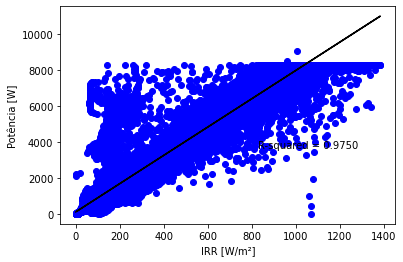

R-square =  0.9750221989800447


In [4]:
#Plotando um gráfico scatter de todos os dias com uma fit line e o R²
plt.scatter(dados_inversor['IRR'],dados_inversor['P_AC'], color = "blue")
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(dados_inversor['IRR'],dados_inversor['P_AC'], 1) #Encontrando a melhor fit line (R²) entre os dois valores
plt.plot(dados_inversor["IRR"], a*dados_inversor["IRR"]+b, color = "black",)
r2 = rsquared(dados_inversor['IRR'],dados_inversor['P_AC'])
plt.text(0.6*dados_inversor['IRR'].max(), 0.4*dados_inversor['P_AC'].max(), 'R-squared = %0.4f' % r2, color = "black")
plt.show()

print("R-square = ", r2)

### Retirando as medidas "defeituosas"

In [5]:
limite = 500
selecao_erros = (dados_inversor['P_AC'] > a*dados_inversor['IRR']+b + limite) | (dados_inversor['P_AC'] < a*dados_inversor['IRR']+b - limite)
dados_errados = dados_inversor[selecao_erros]
dados_certos = dados_inversor[~selecao_erros]

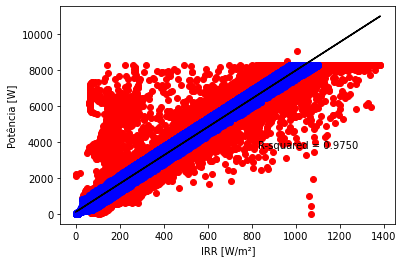

In [6]:
#plotando os valores dentro e fora da faixa definida
plt.scatter(dados_errados['IRR'],dados_errados['P_AC'], color = "red")
plt.scatter(dados_certos['IRR'],dados_certos['P_AC'], color = 'blue')
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(dados_inversor['IRR'],dados_inversor['P_AC'], 1) #Encontrando a melhor fit line entre os dois valores
plt.plot(dados_inversor["IRR"], a*dados_inversor["IRR"]+b, color = "black",)
r2 = rsquared(dados_inversor['IRR'],dados_inversor['P_AC'])
plt.text(0.6*dados_inversor['IRR'].max(), 0.4*dados_inversor['P_AC'].max(), 'R-squared = %0.4f' % r2, color = "black")
plt.show()

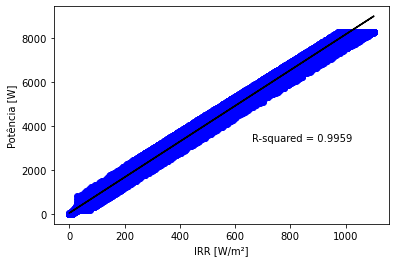

0.9958761165086284


In [7]:
#Imprimindo só os dados certos com o novo R² e a nova fit line
plt.scatter(dados_certos['IRR'],dados_certos['P_AC'], color = "blue")
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(dados_certos['IRR'],dados_certos['P_AC'], 1) #Encontrando a melhor fit line (R²) entre os dois valores
plt.plot(dados_certos["IRR"], a*dados_certos["IRR"]+b, color = "black",)
r2 = rsquared(dados_certos['IRR'],dados_certos['P_AC'])
plt.text(0.6*dados_certos['IRR'].max(), 0.4*dados_certos['P_AC'].max(), 'R-squared = %0.4f' % r2, color = "black")
plt.show()

print(r2)

### Incluindo no gráfico os valores nos quais a potência "estoura"

In [8]:

selecao_PotOverLimit = ((dados_inversor['IRR'] > 1000) & (dados_inversor['P_AC'] > 8200) & (dados_inversor['P_AC'] < 8320))
dados_overlimit = dados_inversor[selecao_PotOverLimit]

frames = [dados_certos, dados_overlimit]
result = pd.concat(frames)

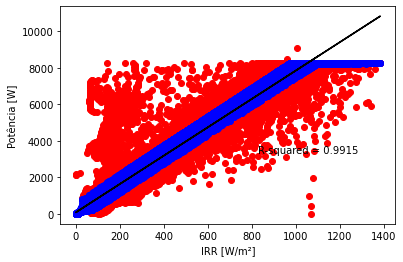

0.9914851504717974


In [9]:
#Plotando o resultado final com R² e fit line calculadas só dos valores certos
plt.scatter(dados_errados['IRR'],dados_errados['P_AC'], color = "red")
plt.scatter(result['IRR'],result['P_AC'], color = "blue")
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(result['IRR'],result['P_AC'], 1) #Encontrando a melhor fit line (R²) entre os dois valores
plt.plot(result["IRR"], a*result["IRR"]+b, color = "black",)

r2 = rsquared(result['IRR'],result['P_AC'])
plt.text(0.6*result['IRR'].max(), 0.4*result['P_AC'].max(), 'R-squared = %0.4f' % r2, color = "black")
plt.show()

print(r2)

### Ajustando a data para ficar no formato datetime da biblioteca pandas para possivel utilização de resample()

In [10]:
#Após pesquisar sobre a função resample do pandas, foi necessário criar uma medida de timestamp com os dados de data do sistema para assim conseguir utilizar a função
#primeiro criei uma váriavel "data" para armazenar o conunto de dia_mes_ano com hora_minuto

# Adicionando um zero no inicio do valor hora_minuto para facilitar a extração dos mesmos
dados_inversor['hora_minuto2'] = '0' + dados_inversor['hora_minuto'].astype(str)

#Criei uma váriavel "data_cru" para obter os dois valores numa mesma variavel
dados_inversor["data_cru"] = dados_inversor['dia_mes_ano'].astype(str) +"-"+ dados_inversor['hora_minuto2'].astype(str)


dados_inversor["data_cru"]

0          20191004-052100
1          20191004-052200
2          20191004-052300
3          20191004-052400
4          20191004-052500
                ...       
198236    20200318-0205000
198237    20200318-0205100
198238    20200318-0205200
198239    20200318-0205300
198240    20200318-0205400
Name: data_cru, Length: 198241, dtype: object

In [11]:
# Agora precisamos incluir barras / e : nas medidas de tempo com isso conseguimos um valor "padrão" de medida de tempo
dados_inversor['data'] = (
    dados_inversor['data_cru'].str[:4] + '-' + #Ano
    dados_inversor['data_cru'].str[4:6]  + '-' + #Mês
    dados_inversor['data_cru'].str[6:8] + ' ' + #dia
    
    dados_inversor['data_cru'].str[-6:-4] + ':' + #Hora
    dados_inversor['data_cru'].str[-4:-2] + ':' + #Minuto
    dados_inversor['data_cru'].str[-2:] # Segundo
)


In [12]:
#Convertendo data para datetime do pandas
dados_inversor['data'] = pd.to_datetime(dados_inversor['data'], errors = 'coerce')
dados_inversor.drop('data_cru', inplace = True, axis=1)
dados_inversor['data']

0        2019-10-04 05:21:00
1        2019-10-04 05:22:00
2        2019-10-04 05:23:00
3        2019-10-04 05:24:00
4        2019-10-04 05:25:00
                 ...        
198236   2020-03-18 20:50:00
198237   2020-03-18 20:51:00
198238   2020-03-18 20:52:00
198239   2020-03-18 20:53:00
198240   2020-03-18 20:54:00
Name: data, Length: 198241, dtype: datetime64[ns]

### Criando a medida PR para cada minuto

In [33]:
# PR = Energia Gerada / (Energia Ideal, IRR = 1000 e Temp = 25C) * (Insolação do periodo (média ou soma)) / 1000
dados_inversor['PR'] = dados_inversor['P_AC'] / (8250 * dados_inversor['IRR'] / 1000)


data
2019-10-04 05:21:00    6
2019-10-04 05:22:00    6
2019-10-04 05:23:00    6
2019-10-04 05:24:00    7
2019-10-04 05:25:00    7
                      ..
2020-03-18 20:50:00    0
2020-03-18 20:51:00    0
2020-03-18 20:52:00    0
2020-03-18 20:53:00    0
2020-03-18 20:54:00    0
Name: IRR, Length: 198241, dtype: int64

### Utilizando Resample para 10min e vendo resultados

In [14]:
'''
Descoberto que a utilização do resample() inclui valores NaN para medidas que pulem mais de um periodo
Como a base de dados tem valores não muito estáveis acabou que incluiu alguns valores NaN na mesma,
    sendo assim tive que retirar esses valores antes de conseguir calcular a fit line e o R² como podemos ver a seguir
'''

'\nDescoberto que a utilização do resample() inclui valores NaN para medidas que pulem mais de um periodo\nComo a base de dados tem valores não muito estáveis acabou que incluiu alguns valores NaN na mesma,\n    sendo assim tive que retirar esses valores antes de conseguir calcular a fit line e o R² como podemos ver a seguir\n'

In [15]:
dados_inversor['data'] = dados_inversor['data'].dt.floor(freq='T')
dados_inversor.set_index('data', inplace = True)

dados_inversor_10m = dados_inversor.resample("10Min").mean()



In [16]:
check_nan = dados_inversor['IRR'].isnull().values.any()
print(check_nan)

False


In [17]:
check_nan = dados_inversor_10m['IRR'].isnull().values.any()
print(check_nan)

True


In [18]:
dados_inversor_10m.dropna(inplace = True)
check_nan = dados_inversor_10m['IRR'].isnull().values.any()
print(check_nan)

False


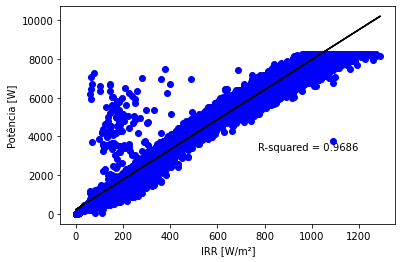

R-square =  0.968630970097392


In [19]:
#Plotando um gráfico scatter de todos os dias com uma fit line e o R²
plt.scatter(dados_inversor_10m['IRR'],dados_inversor_10m['P_AC'], color = "blue")
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(dados_inversor_10m['IRR'],dados_inversor_10m['P_AC'], 1) #Encontrando a melhor fit line (R²) entre os dois valores
plt.plot(dados_inversor_10m["IRR"], a*dados_inversor_10m["IRR"]+b, color = "black",)
r2 = rsquared(dados_inversor_10m['IRR'],dados_inversor_10m['P_AC'])
plt.text(0.6*dados_inversor_10m['IRR'].max(), 0.4*dados_inversor_10m['P_AC'].max(), 'R-squared = %0.4f' % r2, color = "black")
plt.show()

print("R-square = ", r2)

In [20]:
limite = 500
selecao_erros = (dados_inversor_10m['P_AC'] > a*dados_inversor_10m['IRR']+b + limite) | (dados_inversor_10m['P_AC'] < a*dados_inversor_10m['IRR']+b - limite)
dados_errados_10m = dados_inversor_10m[selecao_erros]
dados_certos_10m = dados_inversor_10m[~selecao_erros]

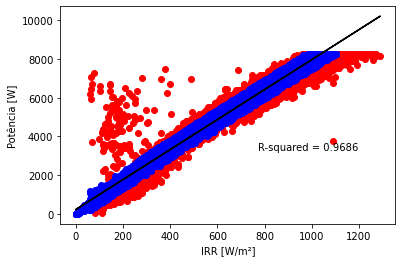

In [21]:
#plotando os valores dentro e fora da faixa definida
plt.scatter(dados_errados_10m['IRR'],dados_errados_10m['P_AC'], color = "red")
plt.scatter(dados_certos_10m['IRR'],dados_certos_10m['P_AC'], color = 'blue')
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(dados_inversor_10m['IRR'],dados_inversor_10m['P_AC'], 1) #Encontrando a melhor fit line entre os dois valores
plt.plot(dados_inversor_10m["IRR"], a*dados_inversor_10m["IRR"]+b, color = "black",)
r2 = rsquared(dados_inversor_10m['IRR'],dados_inversor_10m['P_AC'])
plt.text(0.6*dados_inversor_10m['IRR'].max(), 0.4*dados_inversor_10m['P_AC'].max(), 'R-squared = %0.4f' % r2, color = "black")
plt.show()

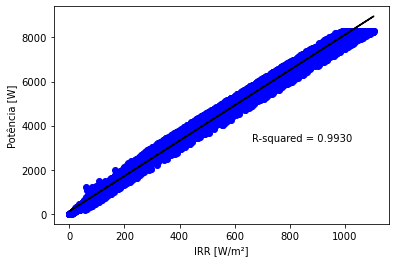

0.9929645652043664


In [22]:
#Imprimindo só os dados certos com o novo R² e a nova fit line
plt.scatter(dados_certos_10m['IRR'],dados_certos_10m['P_AC'], color = "blue")
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(dados_certos_10m['IRR'],dados_certos_10m['P_AC'], 1) #Encontrando a melhor fit line (R²) entre os dois valores
plt.plot(dados_certos_10m["IRR"], a*dados_certos_10m["IRR"]+b, color = "black",)
r2 = rsquared(dados_certos_10m['IRR'],dados_certos_10m['P_AC'])
plt.text(0.6*dados_certos_10m['IRR'].max(), 0.4*dados_certos_10m['P_AC'].max(), 'R-squared = %0.4f' % r2, color = "black")
plt.show()

print(r2)

### Utilizando resample para fazer uma média por hora

In [23]:
dados_inversor_1h = dados_inversor.resample("60Min").mean()

In [24]:
print(dados_inversor_1h.shape[0])

4000


In [25]:
dados_inversor_1h.dropna(inplace = True)
check_nan = dados_inversor_1h['IRR'].isnull().values.any()
print(check_nan)

False


In [26]:
print(dados_inversor_1h.shape[0])

2277


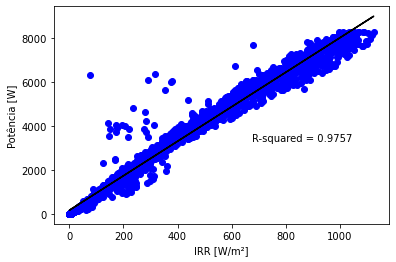

R-square =  0.9756517733169624


In [27]:
#Plotando um gráfico scatter de todos os dias com uma fit line e o R²
plt.scatter(dados_inversor_1h['IRR'],dados_inversor_1h['P_AC'], color = "blue")
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(dados_inversor_1h['IRR'],dados_inversor_1h['P_AC'], 1) #Encontrando a melhor fit line (R²) entre os dois valores
plt.plot(dados_inversor_1h["IRR"], a*dados_inversor_1h["IRR"]+b, color = "black",)
r2 = rsquared(dados_inversor_1h['IRR'],dados_inversor_1h['P_AC'])
plt.text(0.6*dados_inversor_1h['IRR'].max(), 0.4*dados_inversor_1h['P_AC'].max(), 'R-squared = %0.4f' % r2, color = "black")
plt.show()

print("R-square = ", r2)

In [28]:
limite = 500
selecao_erros = (dados_inversor_1h['P_AC'] > a*dados_inversor_1h['IRR']+b + limite) | (dados_inversor_1h['P_AC'] < a*dados_inversor_1h['IRR']+b - limite)
dados_errados_1h = dados_inversor_1h[selecao_erros]
dados_certos_1h = dados_inversor_1h[~selecao_erros]

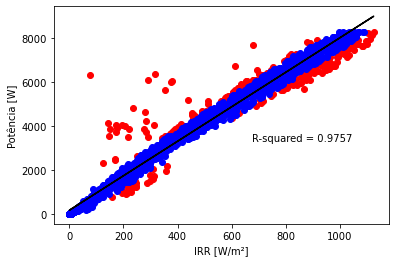

R-square =  0.9756517733169624


In [29]:
#plotando os valores dentro e fora da faixa definida
plt.scatter(dados_errados_1h['IRR'],dados_errados_1h['P_AC'], color = "red")
plt.scatter(dados_certos_1h['IRR'],dados_certos_1h['P_AC'], color = 'blue')
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(dados_inversor_1h['IRR'],dados_inversor_1h['P_AC'], 1) #Encontrando a melhor fit line entre os dois valores
plt.plot(dados_inversor_1h["IRR"], a*dados_inversor_1h["IRR"]+b, color = "black",)
r2 = rsquared(dados_inversor_1h['IRR'],dados_inversor_1h['P_AC'])
plt.text(0.6*dados_inversor_1h['IRR'].max(), 0.4*dados_inversor_1h['P_AC'].max(), 'R-squared = %0.4f' % r2, color = "black")
plt.show()
print("R-square = ", r2)

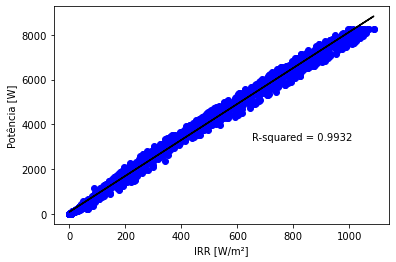

0.9931625730145601


In [30]:
#Imprimindo só os dados certos com o novo R² e a nova fit line
plt.scatter(dados_certos_1h['IRR'],dados_certos_1h['P_AC'], color = "blue")
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(dados_certos_1h['IRR'],dados_certos_1h['P_AC'], 1) #Encontrando a melhor fit line (R²) entre os dois valores
plt.plot(dados_certos_1h["IRR"], a*dados_certos_1h["IRR"]+b, color = "black",)
r2 = rsquared(dados_certos_1h['IRR'],dados_certos_1h['P_AC'])
plt.text(0.6*dados_certos_1h['IRR'].max(), 0.4*dados_certos_1h['P_AC'].max(), 'R-squared = %0.4f' % r2, color = "black")
plt.show()

print(r2)

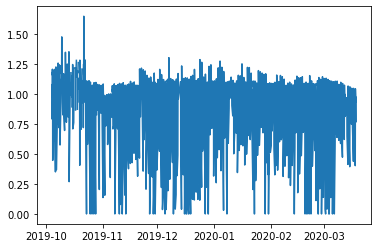

In [32]:
selecao_erros2 = (dados_inversor_1h['P_AC'] != 0)
dados_certos_1h = dados_inversor[~selecao_erros]